In [204]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import community as community_louvain
from collections import Counter

In [205]:
with open("../web_scraping/movie_characters_dict.json", "r") as f:
    movie_char_dict = json.load(f)

with open("../web_scraping/cleaned_comic_characters_dict.json", "r") as f:
    comic_char_dict = json.load(f)

In [206]:
for i in movie_char_dict.items():
    print(i)

('Iron Man', [{'name': 'Tony Stark/Iron Man', 'href': '/wiki/Iron_Man'}, {'name': 'Obadiah Stane/Iron Monger', 'href': '/wiki/Iron_Monger'}, {'name': 'Pepper Potts', 'href': '/wiki/Pepper_Potts'}])
('The Incredible Hulk', [{'name': 'Bruce Banner/Hulk', 'href': '/wiki/Hulk'}, {'name': 'Betty Ross', 'href': '/wiki/Betty_Ross'}, {'name': 'Emil Blonsky/Abomination', 'href': '/wiki/Abomination'}, {'name': 'Thaddeus Ross', 'href': '/wiki/Thaddeus_Ross'}])
('Iron Man 2', [{'name': 'Tony Stark/Iron Man', 'href': '/wiki/Iron_Man'}, {'name': 'Pepper Potts', 'href': '/wiki/Pepper_Potts'}, {'name': 'James Rhodes/War Machine', 'href': '/wiki/War_Machine'}, {'name': 'Natasha Romanoff/Black Widow', 'href': '/wiki/Black_Widow'}, {'name': 'Justin Hammer', 'href': '/wiki/Justin_Hammer'}, {'name': 'Ivan Vanko/Whiplash', 'href': '/wiki/Whiplash'}])
('Thor', [{'name': 'Jane Foster', 'href': '/wiki/Jane_Foster'}, {'name': 'Loki', 'href': '/wiki/Loki'}, {'name': 'Odin', 'href': '/wiki/Odin'}, {'name': 'Heimd

In [207]:
for i in comic_char_dict.items():
    print(i)

('Avengers: Battle the Earth-Wrecker', [{'name': 'Captain America (Steve Rogers)', 'href': '/wiki/Steven_Rogers_(Earth-616)'}, {'name': 'Goliath (Hank Pym)', 'href': '/wiki/Henry_Pym_(Earth-616)'}, {'name': 'Hawkeye (Clint Barton)', 'href': '/wiki/Clinton_Barton_(Earth-616)'}, {'name': 'Wasp (Janet Van Dyne)', 'href': '/wiki/Janet_Van_Dyne_(Earth-616)'}, {'name': 'Iron Man (Tony Stark)', 'href': '/wiki/Anthony_Stark_(Earth-616)'}])
('Fantastic Four in The House of Horrors', [{'name': 'Mr. Fantastic (Reed Richards)', 'href': '/wiki/Reed_Richards_(Earth-616)'}, {'name': 'Invisible Girl (Susan Storm)', 'href': '/wiki/Susan_Storm_(Earth-616)'}, {'name': 'Thing (Ben Grimm)', 'href': '/wiki/Benjamin_Grimm_(Earth-616)'}, {'name': 'Human Torch (Johnny Storm)', 'href': '/wiki/Jonathan_Storm_(Earth-616)'}, {'name': 'Doctor Weird', 'href': '/wiki/Doctor_Weird_(Earth-616)'}])
('Spider-Man Zaps Mr. Zodiac', [{'name': 'Spider-Man (Peter Parker)', 'href': '/wiki/Peter_Parker_(Earth-616)'}, {'name': '

In [208]:
def char_graph(char_dict):
    """
    This functions returns a character graph where characters are connected if they have appeared in the same movie/comic.
    """
    
    G = nx.Graph()

    for node, char in char_dict.items():
        char_names = [i['name'] for i in char]

        # Looping through charcters twice in order to add an edge
        for i, char1 in enumerate(char_names):
            for char2 in char_names[i + 1:]:
                G.add_edge(char1, char2, movie_comic=node)

    return G

In [209]:
G_movie = char_graph(movie_char_dict)

In [210]:
G_movie.edges()

EdgeView([('Tony Stark/Iron Man', 'Obadiah Stane/Iron Monger'), ('Tony Stark/Iron Man', 'Pepper Potts'), ('Tony Stark/Iron Man', 'James Rhodes/War Machine'), ('Tony Stark/Iron Man', 'Natasha Romanoff/Black Widow'), ('Tony Stark/Iron Man', 'Justin Hammer'), ('Tony Stark/Iron Man', 'Ivan Vanko/Whiplash'), ('Tony Stark/Iron Man', 'Steve Rogers/Captain America'), ('Tony Stark/Iron Man', 'Bruce Banner/Hulk'), ('Tony Stark/Iron Man', 'Thor'), ('Tony Stark/Iron Man', 'Clint Barton/Hawkeye'), ('Tony Stark/Iron Man', 'Loki'), ('Tony Stark/Iron Man', 'Phil Coulson'), ('Tony Stark/Iron Man', 'Maria Hill'), ('Tony Stark/Iron Man', 'Nick Fury'), ('Tony Stark/Iron Man', 'James Rhodes/Iron Patriot'), ('Tony Stark/Iron Man', 'Aldrich Killian'), ('Tony Stark/Iron Man', 'Trevor Slattery/"Mandarin"'), ('Tony Stark/Iron Man', 'Pietro Maximoff/Quicksilver'), ('Tony Stark/Iron Man', 'Wanda Maximoff'), ('Tony Stark/Iron Man', 'Vision'), ('Tony Stark/Iron Man', 'Ultron'), ('Tony Stark/Iron Man', 'Bucky Barnes

In [211]:
G_comic = char_graph(comic_char_dict)

In [212]:
G_comic.edges()

EdgeView([('Captain America (Steve Rogers)', 'Goliath (Hank Pym)'), ('Captain America (Steve Rogers)', 'Hawkeye (Clint Barton)'), ('Captain America (Steve Rogers)', 'Wasp (Janet Van Dyne)'), ('Captain America (Steve Rogers)', 'Iron Man (Tony Stark)'), ('Captain America (Steve Rogers)', 'The Hulk (Bruce Banner)'), ('Captain America (Steve Rogers)', 'Thor'), ('Captain America (Steve Rogers)', 'Yellowyacket (Hank Pym)'), ('Captain America (Steve Rogers)', 'Doctor Strange (Stephen Strange)'), ('Captain America (Steve Rogers)', 'Ghost Rider (Johnny Blaze)'), ('Captain America (Steve Rogers)', 'Blade (Eric Brooks)'), ('Captain America (Steve Rogers)', 'Spider-Man (Peter Parker)'), ('Captain America (Steve Rogers)', 'Namor'), ('Captain America (Steve Rogers)', 'Punisher (Frank Castle)'), ('Captain America (Steve Rogers)', 'Elektra'), ('Captain America (Steve Rogers)', 'Luke Cage'), ('Captain America (Steve Rogers)', 'Iron Fist (Danny Rand)'), ('Captain America (Steve Rogers)', 'Deadpool (Wade

In [213]:
components = list(nx.connected_components(G_movie))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(G_movie))
print("Isolated nodes:", isolated_nodes)

component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Number of connected components: 4
Isolated nodes: []
Sizes of each connected component: [160, 13, 13, 5]


In [214]:
components = list(nx.connected_components(G_comic))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(G_comic))
print("Isolated nodes:", isolated_nodes)

component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Number of connected components: 5
Isolated nodes: []
Sizes of each connected component: [319, 2, 3, 5, 4]


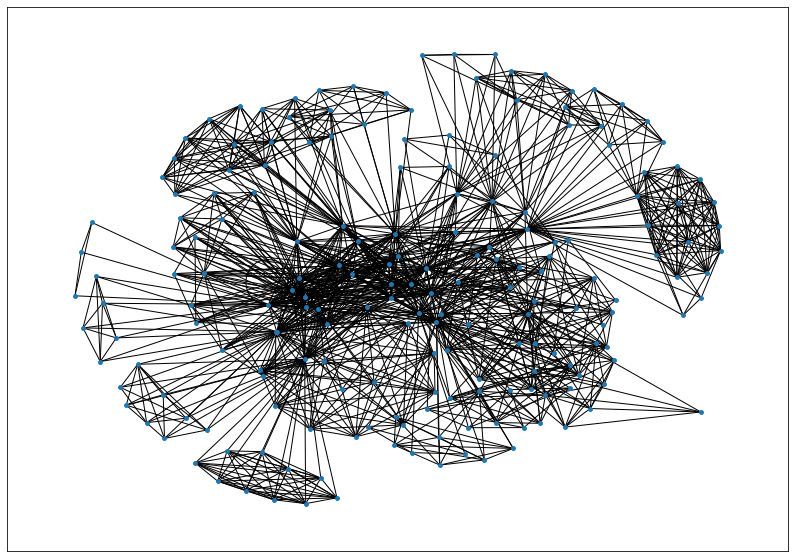

In [215]:
plt.figure(figsize = (14, 10)) 
nx.draw_networkx(G_movie, pos=nx.kamada_kawai_layout(G_movie), with_labels=False, node_size=15)

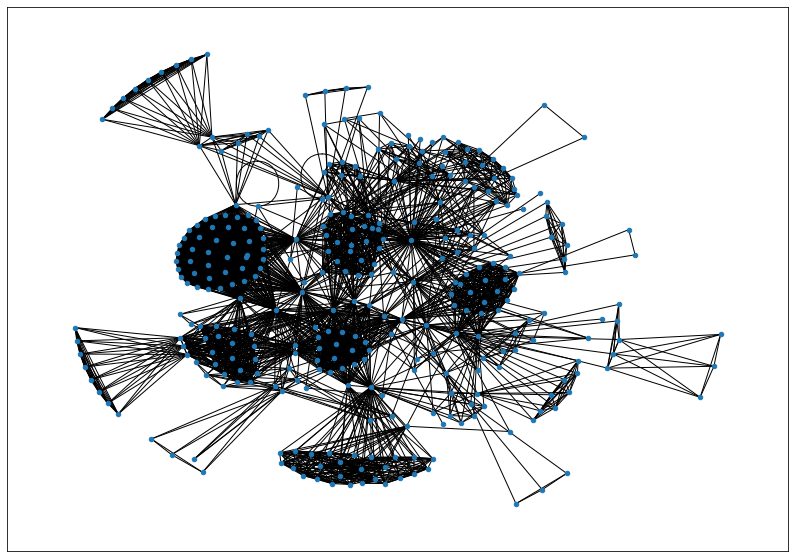

In [216]:
plt.figure(figsize = (14, 10)) 
nx.draw_networkx(G_comic, pos=nx.kamada_kawai_layout(G_comic), with_labels=False, node_size=20)

In [217]:
def bipartite_graph(char_dict):
    """
    This functions returns a bipartite graphs where characters and movie/comics are both used as nodes, 
    and connected if a character has appeared in a movie/comic.
    """
    
    B = nx.Graph()

    for node, char in char_dict.items():
        # Skipping nodes that have no characters
        if not char:
            continue

        # Adding movie/comic nodes
        B.add_node(node, bipartite=0)

        char_names = [i['name'] for i in char]
        
        # Looping through charcters to add their nodes
        for i, char1 in enumerate(char_names):
            B.add_node(char1, bipartite=1)
            B.add_edge(char1, node)

    return B

In [218]:
B_movie = bipartite_graph(movie_char_dict)

In [219]:
B_movie.edges()

EdgeView([('Iron Man', 'Tony Stark/Iron Man'), ('Iron Man', 'Obadiah Stane/Iron Monger'), ('Iron Man', 'Pepper Potts'), ('Tony Stark/Iron Man', 'Iron Man 2'), ('Tony Stark/Iron Man', 'The Avengers'), ('Tony Stark/Iron Man', 'Iron Man 3'), ('Tony Stark/Iron Man', 'Avengers: Age of Ultron'), ('Tony Stark/Iron Man', 'Captain America: Civil War'), ('Tony Stark/Iron Man', 'Spider-Man: Homecoming'), ('Tony Stark/Iron Man', 'Avengers: Infinity War'), ('Tony Stark/Iron Man', 'Avengers: Endgame'), ('Pepper Potts', 'Iron Man 2'), ('Pepper Potts', 'Iron Man 3'), ('The Incredible Hulk', 'Bruce Banner/Hulk'), ('The Incredible Hulk', 'Betty Ross'), ('The Incredible Hulk', 'Emil Blonsky/Abomination'), ('The Incredible Hulk', 'Thaddeus Ross'), ('Bruce Banner/Hulk', 'The Avengers'), ('Bruce Banner/Hulk', 'Avengers: Age of Ultron'), ('Bruce Banner/Hulk', 'Thor: Ragnarok'), ('Bruce Banner/Hulk', 'Avengers: Infinity War'), ('Bruce Banner/Hulk', 'Avengers: Endgame'), ('Iron Man 2', 'James Rhodes/War Machin

In [220]:
B_comic = bipartite_graph(comic_char_dict)

In [221]:
B_comic.edges()

EdgeView([('Avengers: Battle the Earth-Wrecker', 'Captain America (Steve Rogers)'), ('Avengers: Battle the Earth-Wrecker', 'Goliath (Hank Pym)'), ('Avengers: Battle the Earth-Wrecker', 'Hawkeye (Clint Barton)'), ('Avengers: Battle the Earth-Wrecker', 'Wasp (Janet Van Dyne)'), ('Avengers: Battle the Earth-Wrecker', 'Iron Man (Tony Stark)'), ('Captain America (Steve Rogers)', 'Look & Find Marvel Heroes'), ('Captain America (Steve Rogers)', 'Meet Captain America'), ('Captain America (Steve Rogers)', 'The Mighty Avengers: These Are the Avengers'), ('Captain America (Steve Rogers)', 'Avengers: The Kree-Skrull War'), ('Hawkeye (Clint Barton)', 'Look & Find Marvel Heroes'), ('Wasp (Janet Van Dyne)', 'Breakout! (Book)'), ('Wasp (Janet Van Dyne)', 'The Man in the Ant Hill'), ('Iron Man (Tony Stark)', 'Look & Find Marvel Heroes'), ('Iron Man (Tony Stark)', 'Iron Man 2 (novel)'), ('Iron Man (Tony Stark)', 'Iron Man is Born'), ('Iron Man (Tony Stark)', 'Iron Man: Armored Adventures - Attack of the

In [222]:
edges_to_remove = [
    edge for edge in B_movie.edges()
    if B_movie.nodes[edge[0]]['bipartite'] == B_movie.nodes[edge[1]]['bipartite']
]

edges_to_remove
# B_movie.remove_edges_from(edges_to_remove)

[('Thor', 'Jane Foster'),
 ('Thor', 'Loki'),
 ('Thor', 'Odin'),
 ('Thor', 'Heimdall'),
 ('Thor', 'Sif'),
 ('Thor', 'Hogun')]

In [223]:
print("Graph is bipartite:", nx.is_bipartite(B_movie))

components = list(nx.connected_components(B_movie))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(B_movie))
print("Isolated nodes:", isolated_nodes)

component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Graph is bipartite: False
Number of connected components: 4
Isolated nodes: []
Sizes of each connected component: [191, 14, 14, 6]


In [224]:
print("Graph is bipartite:", nx.is_bipartite(B_comic))

components = list(nx.connected_components(B_comic))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(B_comic))
print("Isolated nodes:", isolated_nodes)

component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Graph is bipartite: True
Number of connected components: 12
Isolated nodes: []
Sizes of each connected component: [402, 3, 2, 2, 2, 2, 2, 4, 6, 2, 2, 5]


In [225]:
top_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 0}
bottom_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 1}

print(f"Top nodes (movies/comics): {len(top_nodes)}")
print(f"Bottom nodes (characters): {len(bottom_nodes)}")

Top nodes (movies/comics): 34
Bottom nodes (characters): 191


In [226]:
top_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 0}
bottom_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 1}

print(f"Top nodes (comics): {len(top_nodes)}")
print(f"Bottom nodes (characters): {len(bottom_nodes)}")


Top nodes (comics): 94
Bottom nodes (characters): 340


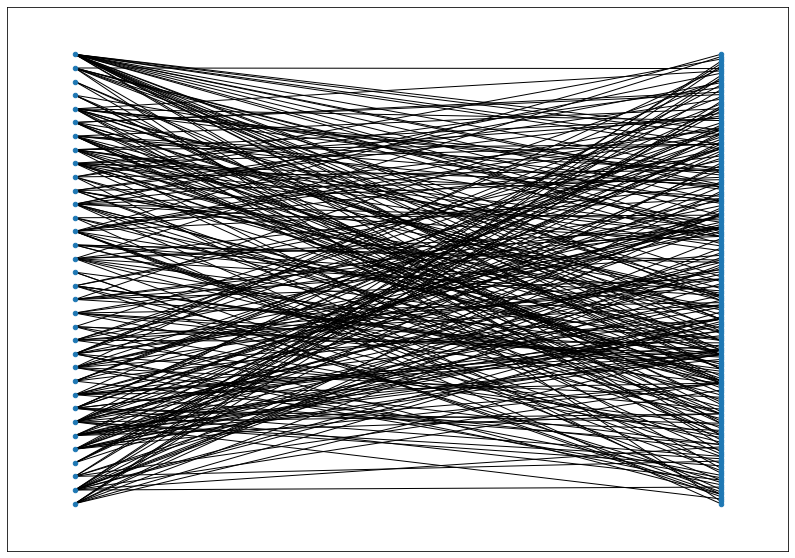

In [227]:
# Get all bipartite sets (and handling the disconnected graph manually)
top_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 0}

plt.figure(figsize=(14, 10))
nx.draw_networkx(B_movie, pos=nx.bipartite_layout(B_movie, nodes=top_nodes), with_labels=False, node_size=20)


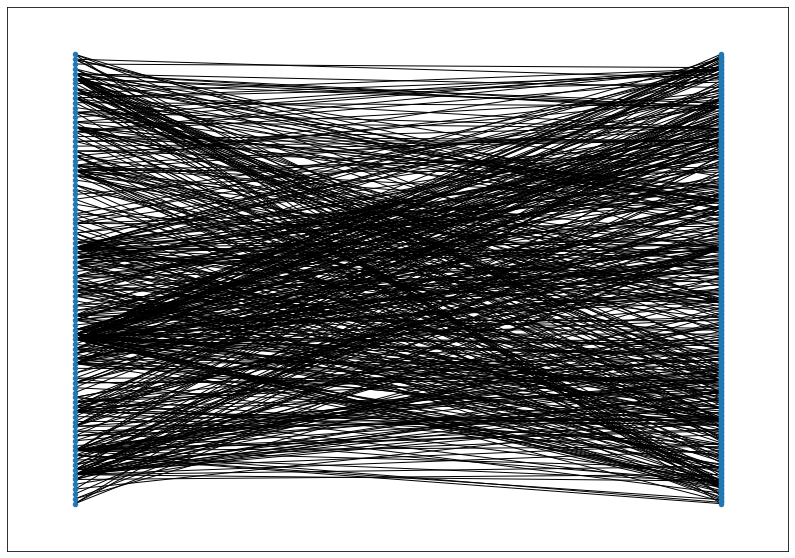

In [228]:
# Get all bipartite sets (and handling the disconnected graph manually)
top_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 0}

plt.figure(figsize=(14, 10))
nx.draw_networkx(B_comic, pos=nx.bipartite_layout(B_comic, nodes=top_nodes), with_labels=False, node_size=20)


In [229]:
deg_centrality_movie = dict(sorted(nx.degree_centrality(G_movie).items(), key=lambda item: item[1], reverse=True))
deg_centrality_comic = dict(sorted(nx.degree_centrality(G_comic).items(), key=lambda item: item[1], reverse=True))

print('Degree centrality of the movie network:', deg_centrality_movie)
print('Degree centrality of the comic network:', deg_centrality_comic)

Degree centrality of the movie network: {'Thor': 0.2631578947368421, 'Bruce Banner/Hulk': 0.22105263157894736, 'Natasha Romanoff/Black Widow': 0.22105263157894736, 'Steve Rogers/Captain America': 0.21578947368421053, 'Tony Stark/Iron Man': 0.21052631578947367, 'Wong': 0.21052631578947367, 'Okoye': 0.20526315789473684, 'Scott Lang/Ant-Man': 0.19999999999999998, 'Nebula': 0.19473684210526315, 'Shuri': 0.18947368421052632, 'Stephen Strange/Doctor Strange': 0.18421052631578946, 'Peter Quill/Star-Lord': 0.17894736842105263, 'Gamora': 0.17894736842105263, 'Drax the Destroyer': 0.17894736842105263, 'Rocket': 0.17894736842105263, 'Peter Parker/Spider-Man': 0.17368421052631577, "T'Challa/Black Panther": 0.16842105263157894, 'Groot': 0.1631578947368421, 'James Rhodes/War Machine': 0.15263157894736842, 'Mantis': 0.15263157894736842, 'Nick Fury': 0.14736842105263157, 'Bucky Barnes/Winter Soldier': 0.14210526315789473, 'Sam Wilson/Falcon': 0.14210526315789473, 'Wanda Maximoff': 0.14210526315789473,

In [230]:
def analyze_graph(G):
    """
    Perform network analysis on the graph.
    """
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_degree = float(L) / N if N > 0 else 0
    
    degrees = [degree for _, degree in G.degree()]
    k_min = np.min(degrees)
    k_max = np.max(degrees)

    avg_clustering_coeff = nx.average_clustering(G)

    deg_centrality = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)

    ############################

    print(f"Number of Nodes: {N}")
    print(f"Number of Edges: {L}")
    print(f"Average Degree: {avg_degree:.2f}")
    
    print(f"Minimum Degree: {k_min}")
    print(f"Maximum Degree: {k_max}")
    
    # if nx.is_connected(G):
    #     avg_short_path = nx.average_shortest_path_length(G)
    #     print(f"Average Shortest Path Length: {avg_short_path:.2f}")
    # else:
    #     print("Graph is not connected. Average Shortest Path Length cannot be computed.")

    print(f"Average Clustering Coefficient: {avg_clustering_coeff:.2f}")

    print("\nDegree Centrality (top 10):")
    for node, degree in deg_centrality[:10]:
        print(f"{node}: {degree:.2f}")



In [231]:
analyze_graph(G_movie)

Number of Nodes: 191
Number of Edges: 1205
Average Degree: 6.31
Minimum Degree: 2
Maximum Degree: 50
Average Clustering Coefficient: 0.91

Degree Centrality (top 10):
Thor: 0.26
Bruce Banner/Hulk: 0.22
Natasha Romanoff/Black Widow: 0.22
Steve Rogers/Captain America: 0.22
Tony Stark/Iron Man: 0.21
Wong: 0.21
Okoye: 0.21
Scott Lang/Ant-Man: 0.20
Nebula: 0.19
Shuri: 0.19


In [232]:
analyze_graph(G_comic)

Number of Nodes: 333
Number of Edges: 3263
Average Degree: 9.80
Minimum Degree: 1
Maximum Degree: 100
Average Clustering Coefficient: 0.90

Degree Centrality (top 10):
Spider-Man (Peter Parker): 0.30
Galactus: 0.30
Doctor Doom: 0.27
Ben Urich: 0.23
Avengers: 0.22
Bolivar Trask: 0.21
Iron Man: 0.19
Cyclops (Scott Summers): 0.17
Thor: 0.15
Thing: 0.14


The comic network, 337 nodesand 3275 edges, is a lot bigger than the movie network which has 191 nodes and 1205 edges. Comics have much more characters and storylines which is expected (and good for our goal of predicting the future)

We also have very high clustering coefficients of 0.9, which aligns the visualization of the networks - characters that appear together form comunities.

The degree centrality top 10 char definitly make sense, they are popular charcters that have often collaborate (at least in movies). The comic centrality shows other characters as well, such as cyclops, dr doom or similar, this is because the comics have a more narrative.


In [233]:
def analyze_gcc(G):
    """
    Perform network analysis on the Largest Connected Component (GCC) of the graph.
    """

    # Extract the Largest Connected Component (GCC)
    if nx.is_connected(G):
        GCC = G
    else:
        gcc = max(nx.connected_components(G), key=len)
        GCC = G.subgraph(gcc).copy()

    # Values for GCC analysis
    N = GCC.number_of_nodes()
    L = GCC.number_of_edges()
    density = nx.density(GCC)
    betweenness_centrality = sorted(nx.betweenness_centrality(GCC).items(), key=lambda item: item[1], reverse=True)
    avg_short_path = nx.average_shortest_path_length(GCC) if nx.is_connected(GCC) else None
    eccentricity = nx.eccentricity(GCC) if nx.is_connected(GCC) else None
    max_eccentricity = max(eccentricity.values()) if eccentricity else None
    diameter = nx.diameter(GCC) if nx.is_connected(GCC) else None

    ############################

    print(f"Largest Connected Component (GCC) Analysis:")
    print(f"Number of Nodes in GCC: {N}")
    print(f"Number of Edges in GCC: {L}")
    print(f"Density of GCC: {density:.4f}")

    print("\nBetweenness Centrality (top 10 nodes):")
    for node, centrality in betweenness_centrality[:10]:
        print(f"{node}: {centrality:.4f}")

    if avg_short_path is not None:
        print(f"\nAverage Shortest Path Length in GCC: {avg_short_path:.2f}")
    else:
        print("\nAverage Shortest Path Length cannot be computed (GCC not connected).")

    if max_eccentricity is not None:
        print(f"Maximum Eccentricity in GCC: {max_eccentricity}")
    else:
        print("Eccentricity cannot be computed (GCC not connected).")

    if diameter is not None:
        print(f"Diameter of GCC: {diameter}")
    else:
        print("Diameter cannot be computed (GCC not connected).")


In [234]:
analyze_gcc(G_movie)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 160
Number of Edges in GCC: 1039
Density of GCC: 0.0817

Betweenness Centrality (top 10 nodes):
Scott Lang/Ant-Man: 0.2346
Thor: 0.1712
Wong: 0.1619
Steve Rogers/Captain America: 0.1064
Natasha Romanoff/Black Widow: 0.0955
Bruce Banner/Hulk: 0.0897
Okoye: 0.0866
Tony Stark/Iron Man: 0.0839
Stephen Strange/Doctor Strange: 0.0746
Peter Parker/Spider-Man: 0.0696

Average Shortest Path Length in GCC: 2.61
Maximum Eccentricity in GCC: 4
Diameter of GCC: 4


In [235]:
analyze_gcc(G_comic)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 319
Number of Edges in GCC: 3240
Density of GCC: 0.0639

Betweenness Centrality (top 10 nodes):
Spider-Man (Peter Parker): 0.2689
Doctor Doom: 0.1604
Iron Man: 0.1599
Avengers: 0.1180
Galactus: 0.1020
Hulk (Bruce Banner): 0.0839
Wolverine (Logan): 0.0762
Ben Urich: 0.0716
Iron Man (Tony Stark): 0.0666
Loki: 0.0663

Average Shortest Path Length in GCC: 2.80
Maximum Eccentricity in GCC: 6
Diameter of GCC: 6


The GCC of movies is denser than comics, showing that movie characters frequently co-appear in ensembles, while comic characters are spread across more diverse stories. Scott Lang/Ant-Man and Thor in the movies network, and Spider-Man and Iron Man in the comics, play central roles in connecting their respective networks. The shorter diameter and path length in movies reflect a more tightly connected character network compared to comics.

In [236]:
analyze_graph(B_movie)

Number of Nodes: 225
Number of Edges: 306
Average Degree: 1.36
Minimum Degree: 1
Maximum Degree: 23
Average Clustering Coefficient: 0.02

Degree Centrality (top 10):
Avengers: Infinity War: 0.10
Ant-Man and the Wasp: Quantumania: 0.06
Thor: 0.06
Eternals: 0.06
Deadpool & Wolverine: 0.06
Guardians of the Galaxy: 0.05
Avengers: Endgame: 0.05
Black Panther: Wakanda Forever: 0.05
Avengers: Age of Ultron: 0.05
Captain America: Civil War: 0.05


In [237]:
analyze_graph(B_comic)

Number of Nodes: 434
Number of Edges: 545
Average Degree: 1.26
Minimum Degree: 1
Maximum Degree: 48
Average Clustering Coefficient: 0.00

Degree Centrality (top 10):
X-Men: Watchers on the Walls: 0.11
Ultimate Super-Villains: 0.06
X-Men/Red Skull: The Chaos Engine: 0.06
Spider-Man: Drowned in Thunder: 0.05
Look & Find Marvel Heroes: 0.05
Spider-Man (Peter Parker): 0.04
Iron Man: 0.04
Iron Man (novel): 0.04
Iron Man: Armored Adventures - High-Tech Hero: 0.03
Spider-Man: Carnage in New York: 0.03


In [238]:
# Distinguish between movies and characters in the bipartial graph
# For movies (bipartite=0)
top_movies = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_movie).items() if B_movie.nodes[node].get("bipartite") == 0], key=lambda x: x[1], reverse=True)

# For characters (bipartite=1)
top_characters = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_movie).items() if B_movie.nodes[node].get("bipartite") == 1], key=lambda x: x[1], reverse=True)

print("Top 10 Movies with the Most Characters:")
for movie, centrality in top_movies[:10]:
    print(f"{movie}: {centrality:.2f}")

print("\nTop 10 Characters in the Most Movies:")
for character, centrality in top_characters[:10]:
    print(f"{character}: {centrality:.2f}")

Top 10 Movies with the Most Characters:
Avengers: Infinity War: 0.10
Ant-Man and the Wasp: Quantumania: 0.06
Eternals: 0.06
Deadpool & Wolverine: 0.06
Guardians of the Galaxy: 0.05
Avengers: Endgame: 0.05
Black Panther: Wakanda Forever: 0.05
Avengers: Age of Ultron: 0.05
Captain America: Civil War: 0.05
Black Panther: 0.05

Top 10 Characters in the Most Movies:
Thor: 0.06
Tony Stark/Iron Man: 0.04
Natasha Romanoff/Black Widow: 0.04
Steve Rogers/Captain America: 0.03
Bruce Banner/Hulk: 0.03
Nick Fury: 0.02
Nebula: 0.02
Scott Lang/Ant-Man: 0.02
James Rhodes/War Machine: 0.02
Loki: 0.02


In [239]:
# Distinguish between comics and characters in the bipartial graph
# For comics (bipartite=0)
top_comics = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_comic).items() if B_comic.nodes[node].get("bipartite") == 0], key=lambda x: x[1], reverse=True)

# For characters (bipartite=1)
top_characters = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_comic).items() if B_comic.nodes[node].get("bipartite") == 1], key=lambda x: x[1], reverse=True)

print("Top 10 Comics with the Most Characters:")
for movie, centrality in top_comics[:10]:
    print(f"{movie}: {centrality:.2f}")

print("\nTop 10 Characters in the Most Comics:")
for character, centrality in top_characters[:10]:
    print(f"{character}: {centrality:.2f}")


Top 10 Comics with the Most Characters:
X-Men: Watchers on the Walls: 0.11
Ultimate Super-Villains: 0.06
X-Men/Red Skull: The Chaos Engine: 0.06
Spider-Man: Drowned in Thunder: 0.05
Look & Find Marvel Heroes: 0.05
Iron Man (novel): 0.04
Iron Man: Armored Adventures - High-Tech Hero: 0.03
Spider-Man: Carnage in New York: 0.03
Spider-Man: Goblin Moon: 0.03
X-Men: Enter The X-Men: 0.03

Top 10 Characters in the Most Comics:
Spider-Man (Peter Parker): 0.04
Iron Man: 0.04
Hulk (Bruce Banner): 0.03
Earth-904913: 0.02
Iron Man (Tony Stark): 0.02
Mr. Fantastic (Reed Richards): 0.02
Human Torch (Johnny Storm): 0.02
Humans: 0.02
Invisible Woman (Susan Storm): 0.02
The Thing (Ben Grimm): 0.02


Compared to before, the bipartite networks have a larger number of nodes and clustering coeff of 0 (because there no connections between nodes of the same type).

Another difference is that the average degrees are low now, 1.36 and 1.24, which would again indicate sparse connections

For the movies, Avengersr stand out, while for the comics, the X-men series and and various Spider-Man and Iron Man comics (which are earlier movies - so maybe picked as the most famous comics?).

In terms of characters Thor and Tony Stark dominate in terms of appearances across multiple movies, while for comics, Iron Man, Spider-Man, and Hulk emerge as the most connected.

In [240]:
analyze_gcc(B_movie)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 191
Number of Edges in GCC: 275
Density of GCC: 0.0152

Betweenness Centrality (top 10 nodes):
Avengers: Infinity War: 0.4874
Avengers: Endgame: 0.2719
Scott Lang/Ant-Man: 0.2257
Thor: 0.1990
Wong: 0.1546
Ant-Man and the Wasp: Quantumania: 0.1156
Tony Stark/Iron Man: 0.1126
Steve Rogers/Captain America: 0.1092
Shang-Chi and the Legend of the Ten Rings: 0.1028
Natasha Romanoff/Black Widow: 0.1027

Average Shortest Path Length in GCC: 4.87
Maximum Eccentricity in GCC: 8
Diameter of GCC: 8


In [241]:
analyze_gcc(B_comic)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 402
Number of Edges in GCC: 524
Density of GCC: 0.0065

Betweenness Centrality (top 10 nodes):
Spider-Man (Peter Parker): 0.2828
Ultimate Super-Villains: 0.2800
X-Men: Watchers on the Walls: 0.2422
Iron Man: 0.1885
Look & Find Marvel Heroes: 0.1800
Hulk Saves the Day: 0.1716
Spider-Man: Drowned in Thunder: 0.1614
Doctor Doom: 0.1475
X-Men/Red Skull: The Chaos Engine: 0.1409
Hulk (Bruce Banner): 0.1074

Average Shortest Path Length in GCC: 5.44
Maximum Eccentricity in GCC: 13
Diameter of GCC: 13


The GCC of movies network is denser than comics network, reflecting stronger character-to-movie connections in films compared to the more distributed connections in comics. Avengers: Infinity War and Avengers: Endgame dominate the b_movies network, emphasizing their central role in uniting characters, while in b_comics, books like Ultimate Super-Villains and X-Men: Watchers on the Walls play a similar centralizing role. The larger diameter and average path length in b_comics suggest a more sprawling and less cohesive structure compared to the tighter connections in b_movies.

# Communities

In [242]:
# Louvain on the entire graph
def apply_louvain(G):
    # Apply Louvain method
    partition = community_louvain.best_partition(G)
    
    modularity = community_louvain.modularity(partition, G)

    # Print results
    num_communities = len(set(partition.values()))
    print(f"Number of communities detected: {num_communities}")
    print(f"Modularity: {modularity:.4f}")
    
    
    # Visualize the communities
    pos = nx.spring_layout(G)  # Node positions for visualization
    plt.figure(figsize=(10, 7))
    nx.draw(
        G, pos, 
        node_color=[partition[node] for node in G.nodes()],
        with_labels=False, 
        node_size=30, 
        cmap=plt.cm.tab20
    )
    plt.title("Louvain Communities")
    plt.show()

    return partition

Number of communities detected: 8
Modularity: 0.5911


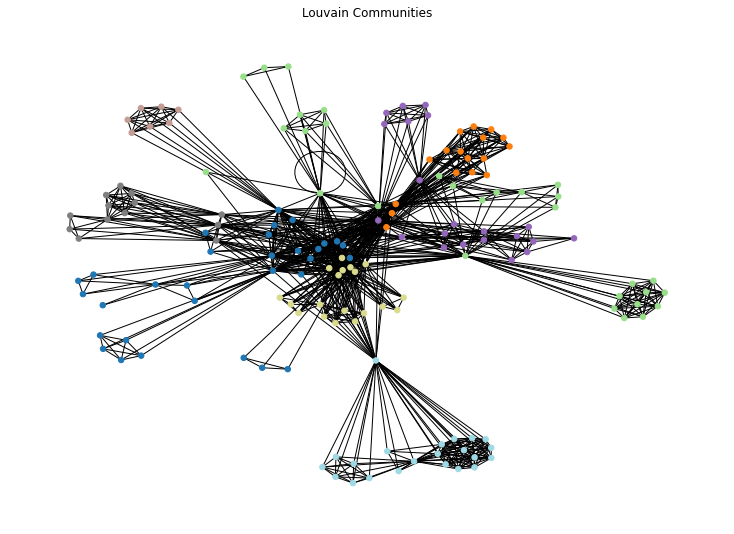

In [243]:
# For the GCC 
gcc_movie = max(nx.connected_components(G_movie), key=len)
GCC_movie = G_movie.subgraph(gcc_movie).copy()
partition_gcc_movie = apply_louvain(GCC_movie) 


Number of communities detected: 8
Modularity: 0.6687


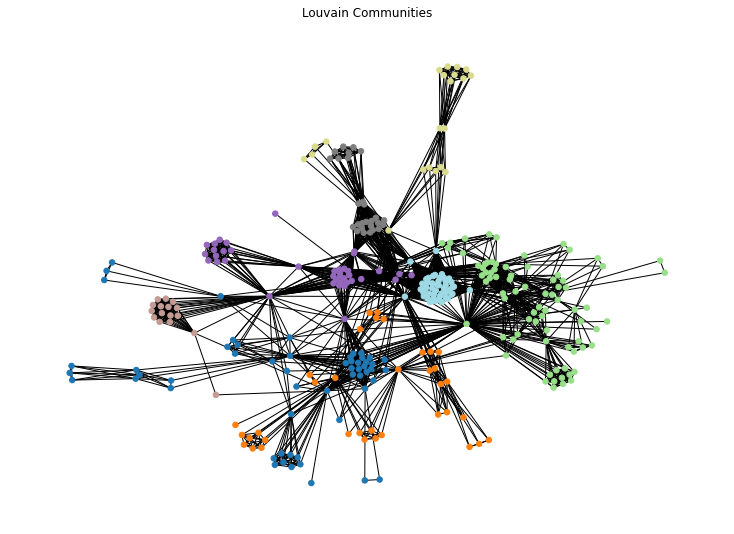

In [244]:
# For the GCC
gcc_comic = max(nx.connected_components(G_comic), key=len)
GCC_comic = G_comic.subgraph(gcc_comic).copy()
partition_gcc_comic = apply_louvain(GCC_comic) 

Modularity values of 0.5888 for movies and 0.6719 for comics suggest that both networks have a strong community structure, but the community in the comics network is slightly more defined than in the movies network

In [245]:
def plot_community_sizes_and_interconnectivity(G, partition):
    # Count nodes in each community
    community_sizes = Counter(partition.values())
    
    # Sort communities by size in descending order (by y-values)
    sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
    sorted_ids, sorted_sizes = zip(*sorted_communities)
    
    # Calculate inter-community connectivity
    interconnectivity = {comm: 0 for comm in community_sizes.keys()}
    for node1, node2 in G.edges():
        comm1 = partition[node1]
        comm2 = partition[node2]
        if comm1 != comm2:  # Edge connects nodes in different communities
            interconnectivity[comm1] += 1
            interconnectivity[comm2] += 1

    # Sort interconnectivity in the same order as community sizes
    sorted_interconnectivity = [interconnectivity[comm] for comm in sorted_ids]
    
    # Plot community size distribution
    plt.figure(figsize=(14, 5))

    # Subplot 1: Community sizes
    plt.subplot(1, 2, 1)
    plt.bar(range(len(sorted_ids)), sorted_sizes, tick_label=sorted_ids, width=0.8)
    plt.title("Community Size Distribution")
    plt.xlabel("Community ID")
    plt.ylabel("Number of Nodes")
    plt.xticks(rotation=45)

    # Subplot 2: Inter-community edges
    plt.subplot(1, 2, 2)
    plt.bar(range(len(sorted_ids)), sorted_interconnectivity, tick_label=sorted_ids, width=0.8, color="orange")
    plt.title("Inter-Community Edge Distribution")
    plt.xlabel("Community ID")
    plt.ylabel("Number of Inter-Community Edges")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
    
    # Print community sizes and interconnectivity
    print("Community Sizes and Interconnectivity:")
    for i, comm in enumerate(sorted_ids):
        print(f"Community {comm}: {sorted_sizes[i]} nodes, {sorted_interconnectivity[i]} inter-community edges")



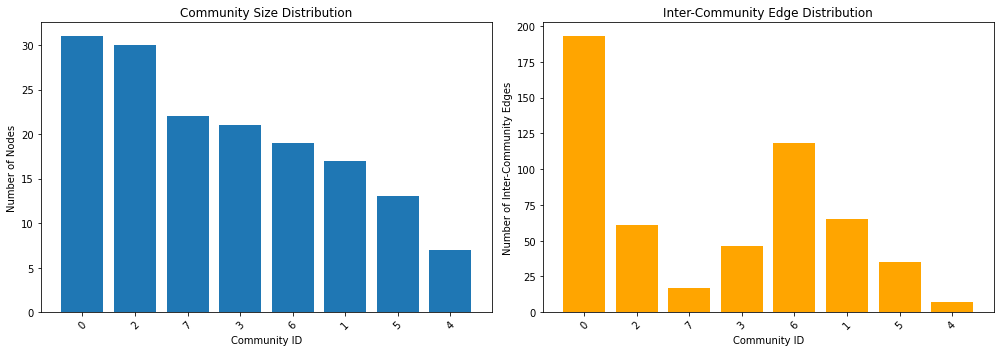

Community Sizes and Interconnectivity:
Community 0: 31 nodes, 193 inter-community edges
Community 2: 30 nodes, 61 inter-community edges
Community 7: 22 nodes, 17 inter-community edges
Community 3: 21 nodes, 46 inter-community edges
Community 6: 19 nodes, 118 inter-community edges
Community 1: 17 nodes, 65 inter-community edges
Community 5: 13 nodes, 35 inter-community edges
Community 4: 7 nodes, 7 inter-community edges


In [246]:
plot_community_sizes_and_interconnectivity(GCC_movie, partition_gcc_movie)


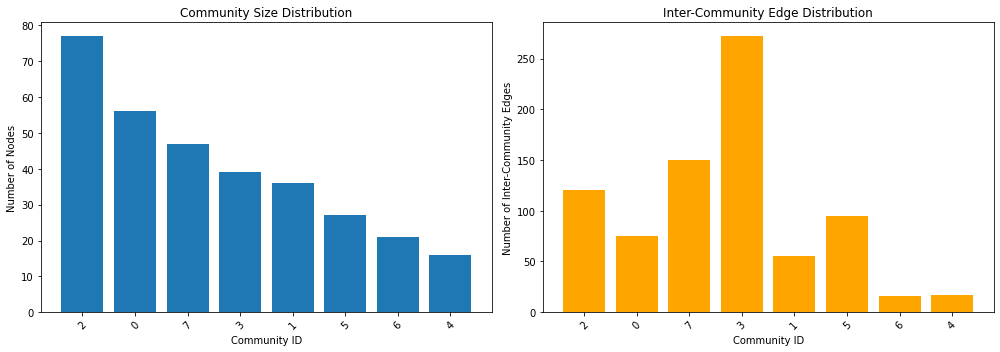

Community Sizes and Interconnectivity:
Community 2: 77 nodes, 120 inter-community edges
Community 0: 56 nodes, 75 inter-community edges
Community 7: 47 nodes, 150 inter-community edges
Community 3: 39 nodes, 272 inter-community edges
Community 1: 36 nodes, 55 inter-community edges
Community 5: 27 nodes, 95 inter-community edges
Community 6: 21 nodes, 16 inter-community edges
Community 4: 16 nodes, 17 inter-community edges


In [247]:
plot_community_sizes_and_interconnectivity(GCC_comic, partition_gcc_comic)

In [248]:
def plot_inter_community_graph(G, partition):
    # Create a new graph where each node is a community
    community_graph = nx.Graph()
    community_sizes = Counter(partition.values())
    for node1, node2 in G.edges():
        comm1 = partition[node1]
        comm2 = partition[node2]
        if comm1 != comm2:
            if community_graph.has_edge(comm1, comm2):
                community_graph[comm1][comm2]['weight'] += 1
            else:
                community_graph.add_edge(comm1, comm2, weight=1)

    # Node sizes based on community sizes
    max_size = max(community_sizes.values()) if community_sizes else 1
    node_sizes = [(community_sizes[comm] / max_size) * 3000 for comm in community_graph.nodes()]

    # Extract edge weights and scale for thickness
    edges, weights = zip(*nx.get_edge_attributes(community_graph, 'weight').items())
    max_weight = max(weights) if weights else 1  # Avoid division by zero
    normalized_weights = [weight / max_weight * 5 for weight in weights]  # Scale thickness (adjust factor as needed)

    
    # Plot the community-level graph with edge weights
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(community_graph)
    nx.draw(
        community_graph, pos, 
        with_labels=True, 
        node_size=node_sizes, 
        font_size=10, 
        node_color='lightblue', 
        edge_color='gray',
        width=normalized_weights
    )
 
    plt.title("Inter-Community Graph with Node Sizes")
    plt.show()


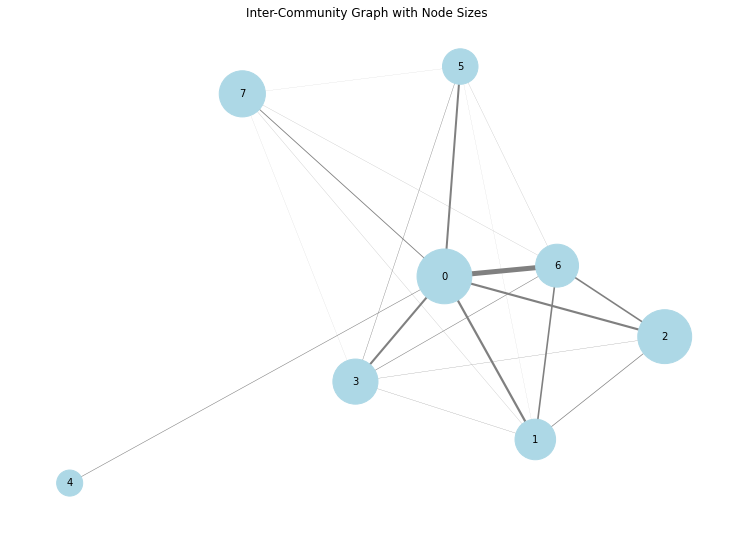

In [249]:
plot_inter_community_graph(GCC_movie, partition_gcc_movie)

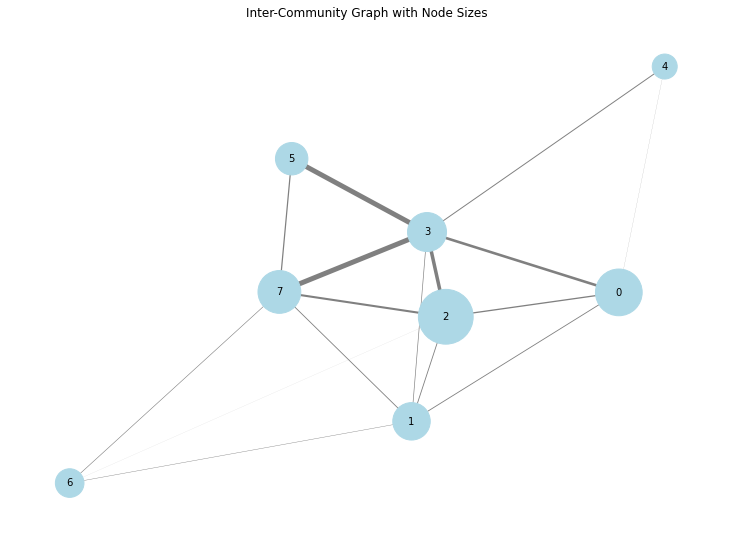

In [250]:
plot_inter_community_graph(GCC_comic, partition_gcc_comic)

From the histogram and nodes plot, we observe no strong correlation between the size of a community and its connections to others. In the movie network, Community 3 stands out with the highest number of inter-community edges, forming strong connections with Communities 6 and 0, while Community 1 is the most isolated. In the comic network, although Community 2 is the largest, Community 6 has the highest connectivity, especially with Communities 5 and 7, while Community 1 remains the most isolated.

In [251]:
# Name of the communities members

def print_top_nodes_by_community(G, partition, communities_to_analyze, top_n=5):
    """
    Print the top N nodes (by degree) for specified communities.

    Parameters:
    - G: The graph (NetworkX object)
    - partition: The community partition dictionary (node -> community)
    - communities_to_analyze: List of community IDs to analyze
    - top_n: Number of top nodes to return for each community
    """
    for community in communities_to_analyze:
        # Get all nodes in the specified community
        community_nodes = [node for node, comm in partition.items() if comm == community]
        
        # Get the degrees of nodes in this community
        community_degrees = {node: G.degree(node) for node in community_nodes}
        
        # Sort nodes by degree in descending order
        sorted_nodes = sorted(community_degrees.items(), key=lambda x: x[1], reverse=True)
        
        # Get the top N nodes
        top_nodes = sorted_nodes[:top_n]
        
        # Print the results
        print(f"Top {top_n} nodes by degree in Community {community}:")
        for node, degree in top_nodes:
            print(f"  {node}")
        print()  # Blank line for better readability

# Communities to analyze for GCC movie
movie_communities = [3, 6, 0, 1]
print("Top nodes for GCC Movie:")
print_top_nodes_by_community(GCC_movie, partition_gcc_movie, movie_communities)

# Communities to analyze for GCC comic
comic_communities = [2, 6, 5, 7, 1]
print("Top nodes for GCC Comic:")
print_top_nodes_by_community(GCC_comic, partition_gcc_comic, comic_communities)


Top nodes for GCC Movie:
Top 5 nodes by degree in Community 3:
  Thor
  Loki
  Odin
  Heimdall
  Korg

Top 5 nodes by degree in Community 6:
  Nebula
  Peter Quill/Star-Lord
  Gamora
  Drax the Destroyer
  Rocket

Top 5 nodes by degree in Community 0:
  Bruce Banner/Hulk
  Natasha Romanoff/Black Widow
  Steve Rogers/Captain America
  Tony Stark/Iron Man
  James Rhodes/War Machine

Top 5 nodes by degree in Community 1:
  Okoye
  Shuri
  T'Challa/Black Panther
  Nakia
  Everett Ross

Top nodes for GCC Comic:
Top 5 nodes by degree in Community 2:
  Spider-Man (Peter Parker)
  Flash Thompson
  J. Jonah Jameson
  Chameleon
  Betty Brant

Top 5 nodes by degree in Community 6:
  Wolverine (Logan)
  Rogue
  Jean Grey
  Wolverine
  Cyclops

Top 5 nodes by degree in Community 5:
  Saturnyne
  Opul Lun Sat-Yr-Nin (Earth-794)
  Adolf Hitler
  Captain UK (Linda McQuillan)
  Captain Wales (Huw Gruffydd)(Death)

Top 5 nodes by degree in Community 7:
  Doctor Doom
  Ben Urich
  Bolivar Trask
  Cyclops

In [252]:
node_A = 'Peter Parker/Spider-Man'
node_B = 'Wolverine'

# Find all simple paths between the two nodes
all_paths = nx.all_simple_paths(G_movie, source=node_A, target=node_B)


In [253]:
node_A = 'Peter Parker/Spider-Man'
node_B = 'Wolverine'

# Find all simple paths between the two nodes
all_paths = nx.all_simple_paths(G_movie, source=node_A, target=node_B)

# Counter to give each file a unique name
counter = 0

# Draw each path
for path in all_paths:
    # Create a subgraph containing only the nodes and edges of the current path
    H = G_movie.subgraph(path)

    # Calculate layout for the subgraph
    pos = nx.kamada_kawai_layout(H, scale=20)

    plt.figure(figsize=(12, 10))
    plt.axis("off")
    nx.draw_networkx_nodes(H, pos, node_size=100, node_color="red")
    nx.draw_networkx_edges(H, pos, edge_color="black", width=0.5)
    nx.draw_networkx_labels(H, pos, font_color='blue', font_size=8)

    # # Save the plot to a file
    # filename = f"path_{counter}.png"
    # plt.savefig(filename)

    # Optionally, show the plot
    plt.show()

    counter += 1
    
    # Break the loop after displaying 10 paths
    if counter >= 10:
        break

KeyboardInterrupt: 

In [ ]:
# Function to find the top 20 nodes by degree centrality
def get_top_20_nodes(graph):
    degree_centrality = nx.degree_centrality(graph)
    # Sort nodes by degree centrality in descending order and pick top 20
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs
top_20_movie = get_top_20_nodes(G_movie)
top_20_comics = get_top_20_nodes(G_comic)

# Function to create a custom color-coded DataFrame for the top nodes
def create_table(top_nodes, graph_name):
    # Create a pandas DataFrame for the top nodes and degree centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Degree Centrality'])
    
    # Color code the degree centrality
    def color_code(val):
        # Custom color scheme based on degree centrality value
        color = plt.cm.twilight(val)  # Using 'coolwarm' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding to the 'Degree Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Degree Centrality'])
    
    # Remove index row and display the table
    df_styled = df_styled.hide(axis="index")
    
    # Display the DataFrame with a title
    display(df_styled.set_table_attributes('class="table table-striped"'))

# Create and display the tables for both graphs
create_table(top_20_movie, "G_movie")
create_table(top_20_comics, "G_comic")

Node,Degree Centrality
Thor,0.263158
Bruce Banner/Hulk,0.221053
Natasha Romanoff/Black Widow,0.221053
Steve Rogers/Captain America,0.215789
Tony Stark/Iron Man,0.210526
Wong,0.210526
Okoye,0.205263
Scott Lang/Ant-Man,0.200000
Nebula,0.194737
Shuri,0.189474


Node,Degree Centrality
Spider-Man (Peter Parker),0.301205
Galactus,0.295181
Doctor Doom,0.274096
Ben Urich,0.228916
Avengers,0.216867
Bolivar Trask,0.207831
Iron Man,0.192771
Cyclops (Scott Summers),0.165663
Thor,0.153614
Thing,0.141566


In [ ]:
# Function to find the top 20 nodes by degree centrality
def get_top_20_nodes(graph):
    betweenness_centrality = nx.betweenness_centrality(graph)
    # Sort nodes by degree centrality in descending order and pick top 20
    sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs
top_20_movie = get_top_20_nodes(G_movie)
top_20_comics = get_top_20_nodes(G_comic)

# Function to create a custom color-coded DataFrame for the top nodes
def create_table(top_nodes, graph_name):
    # Create a pandas DataFrame for the top nodes and degree centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Betweenness Centrality'])
    
    # Color code the degree centrality
    def color_code(val):
        # Custom color scheme based on degree centrality value
        color = plt.cm.twilight(val)  # Using 'coolwarm' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding to the 'Degree Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Betweenness Centrality'])
    
    # Remove index row and display the table
    df_styled = df_styled.hide(axis="index")
    
    # Display the DataFrame with a title
    display(df_styled.set_table_attributes('class="table table-striped"'))

# Create and display the tables for both graphs
create_table(top_20_movie, "G_movie")
create_table(top_20_comics, "G_comic")

Node,Betweenness Centrality
Scott Lang/Ant-Man,0.164156
Thor,0.119777
Wong,0.113283
Steve Rogers/Captain America,0.074435
Natasha Romanoff/Black Widow,0.066822
Bruce Banner/Hulk,0.062749
Okoye,0.060615
Tony Stark/Iron Man,0.058707
Stephen Strange/Doctor Strange,0.052158
Peter Parker/Spider-Man,0.048669


Node,Betweenness Centrality
Spider-Man (Peter Parker),0.246666
Doctor Doom,0.147183
Iron Man,0.146651
Avengers,0.108257
Galactus,0.093538
Hulk (Bruce Banner),0.076927
Wolverine (Logan),0.069863
Ben Urich,0.065666
Iron Man (Tony Stark),0.061077
Loki,0.060800


In [201]:
def create_table(top_nodes, graph_name):
    # Create a pandas DataFrame for the top nodes and degree centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Degree Centrality'])
    
    # Round degree centrality values to 4 decimal places
    df['Degree Centrality'] = df['Degree Centrality'].round(4)
    
    # Color code the degree centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on degree centrality value
        color = plt.cm.twilight(val)  # Using 'twilight' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Degree Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Degree Centrality'])
    
    # Save the table as an image using matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))  # Set the size of the figure
    ax.axis('off')  # Turn off the axis
    
    # Render the table on the matplotlib axes
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for degree centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Degree Centrality' column only
                color = plt.cm.twilight(df['Degree Centrality'][i])  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Ensure the figure background is transparent
    fig.patch.set_alpha(0.0)

    # Save the table as an image
    image_filename = f"{graph_name}_top_20_nodes_table.png"
    plt.savefig(image_filename, bbox_inches='tight', dpi=300)
    plt.close()
    print(f"Table saved as {image_filename}")

# Example call to create and save the tables for both graphs
# top_20_movie and top_20_comics should be your actual top 20 nodes lists
create_table(top_20_movie, "G_movie")
create_table(top_20_comics, "G_comics")

Table saved as G_movie_top_20_nodes_table.png
Table saved as G_comics_top_20_nodes_table.png


In [202]:
# Function to create a custom color-coded DataFrame for the top nodes
def create_table_subplot(top_nodes, ax, title):
    # Create a pandas DataFrame for the top nodes and degree centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Degree Centrality'])
    
    # Round degree centrality values to 4 decimal places
    df['Degree Centrality'] = df['Degree Centrality'].round(4)
    
    # Color code the degree centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on degree centrality value
        color = plt.cm.twilight(val)  # Using 'twilight' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Degree Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Degree Centrality'])
    
    # Render the table on the given axis (ax)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for degree centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Degree Centrality' column only
                color = plt.cm.twilight(df['Degree Centrality'][i])  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Set title for the subplot
    ax.set_title(title, fontsize=16)

    # Ensure the figure background is transparent
    ax.axis('off')  # Hide axes

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create and place the tables on the subplots
create_table_subplot(top_20_movie, ax1, "Top 20 Movie Nodes")
create_table_subplot(top_20_comics, ax2, "Top 20 Comics Nodes")

# Save the combined figure as an image
image_filename = "combined_top_20_nodes_table.png"
plt.tight_layout()  # Adjust the layout
plt.savefig(image_filename, bbox_inches='tight', dpi=300)
plt.close()

print(f"Combined table saved as {image_filename}")


Combined table saved as combined_top_20_nodes_table.png


In [258]:
def create_table_subplot(top_nodes, ax, title):
    # Create a pandas DataFrame for the top nodes and betweenness centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Betweenness Centrality'])
    
    # Round betweenness centrality values to 4 decimal places
    df['Betweenness Centrality'] = df['Betweenness Centrality'].round(4)
    
    # Color code the betweenness centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on betweenness centrality value
        color = plt.cm.twilight(val)  # Using 'twilight' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Betweenness Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Betweenness Centrality'])
    
    # Render the table on the given axis (ax)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for betweenness centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Betweenness Centrality' column only
                color = plt.cm.twilight(df['Betweenness Centrality'][i])  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Set title for the subplot
    ax.set_title(title, fontsize=16)

    # Ensure the figure background is transparent
    ax.axis('off')  # Hide axes

# Function to get the top 20 nodes by betweenness centrality
def get_top_20_nodes_by_betweenness(graph):
    betweenness_centrality = nx.betweenness_centrality(graph)
    # Sort nodes by betweenness centrality in descending order and pick top 20
    sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes by betweenness centrality for both graphs
top_20_movie = get_top_20_nodes_by_betweenness(G_movie)
top_20_comics = get_top_20_nodes_by_betweenness(G_comic)

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create and place the tables on the subplots
create_table_subplot(top_20_movie, ax1, "Top 20 Movie Nodes")
create_table_subplot(top_20_comics, ax2, "Top 20 Comics Nodes")

# Save the combined figure as an image
image_filename = "combined_top_20_nodes_betweenness.png"
plt.tight_layout()  # Adjust the layout
plt.savefig(image_filename, bbox_inches='tight', dpi=300)
plt.close()

print(f"Combined table saved as {image_filename}")

Combined table saved as combined_top_20_nodes_betweenness.png


In [ ]:
from matplotlib.colors import Normalize
# Function to create a custom color-coded DataFrame for the top nodes
def create_table_subplot(top_nodes, ax, title):
    # Create a pandas DataFrame for the top nodes and closeness centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Closeness Centrality'])
    
    # Round closeness centrality values to 4 decimal places
    df['Closeness Centrality'] = df['Closeness Centrality'].round(4)
    
    # Normalize the closeness centrality values for color scaling
    min_val = df['Closeness Centrality'].min()
    max_val = df['Closeness Centrality'].max()
    norm = Normalize(vmin=min_val, vmax=max_val)
    
    # Color code the closeness centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on normalized closeness centrality value
        color = plt.cm.cividis(norm(val))  # Using 'twilight' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Closeness Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Closeness Centrality'])
    
    # Render the table on the given axis (ax)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for closeness centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Closeness Centrality' column only
                color = plt.cm.cividis(norm(df['Closeness Centrality'][i]))  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Set title for the subplot
    ax.set_title(title, fontsize=16)

    # Ensure the figure background is transparent
    ax.axis('off')  # Hide axes

# Function to get top 20 nodes by closeness centrality
def get_top_20_nodes_by_closeness(graph):
    closeness_centrality = nx.closeness_centrality(graph)
    # Sort nodes by closeness centrality in descending order and pick top 20
    sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs based on closeness centrality
top_20_movie = get_top_20_nodes_by_closeness(G_movie)
top_20_comics = get_top_20_nodes_by_closeness(G_comic)

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create and place the tables on the subplots
create_table_subplot(top_20_movie, ax1, "Top 20 Movie Nodes (Closeness Centrality)")
create_table_subplot(top_20_comics, ax2, "Top 20 Comics Nodes (Closeness Centrality)")

# Save the combined figure as an image
image_filename = "top_20_nodes_closeness_table.png"
plt.tight_layout()  # Adjust the layout
plt.savefig(image_filename, bbox_inches='tight', dpi=300)
plt.close()

print(f"Combined table saved as {image_filename}")

Combined table saved as top_20_nodes_closeness_table.png
